In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 25.7MB/s]


In [ ]:
!unzip /content/titanic-dataset.zip

Archive:  /content/titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [ ]:
cat_features =['Survived', 'Pclass'	,	'Sex'	,	'SibSp' , 	'Parch'	,	'Embarked']

In [ ]:
for fe in cat_features:
  print(df[fe].value_counts())
  print('====================')

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Embarked'>

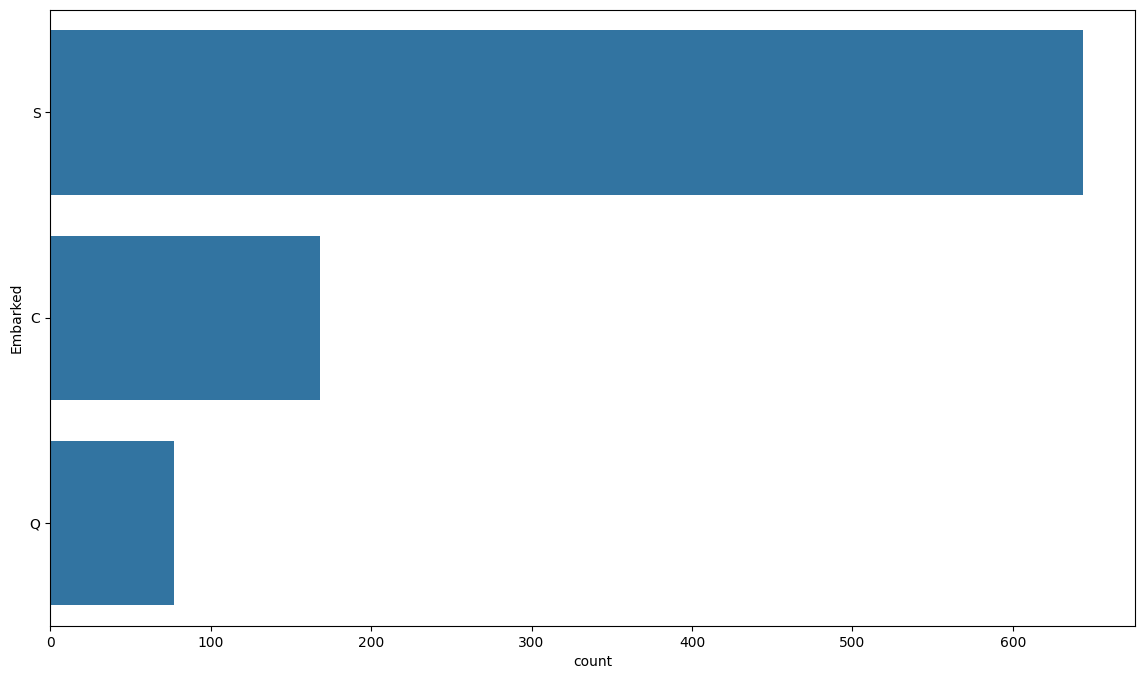

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot( df['Embarked'])

<Axes: xlabel='count', ylabel='Embarked'>

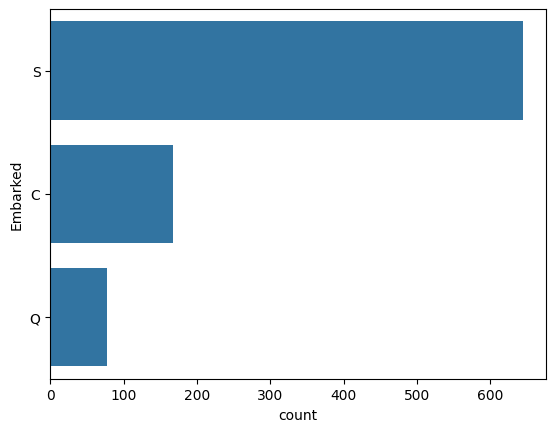

In [ ]:
sns.countplot( df['Embarked'])

In [ ]:
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
df =df.drop(columns=['PassengerId' , 'Name' , 'Ticket' , 'Cabin'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: ylabel='Age'>

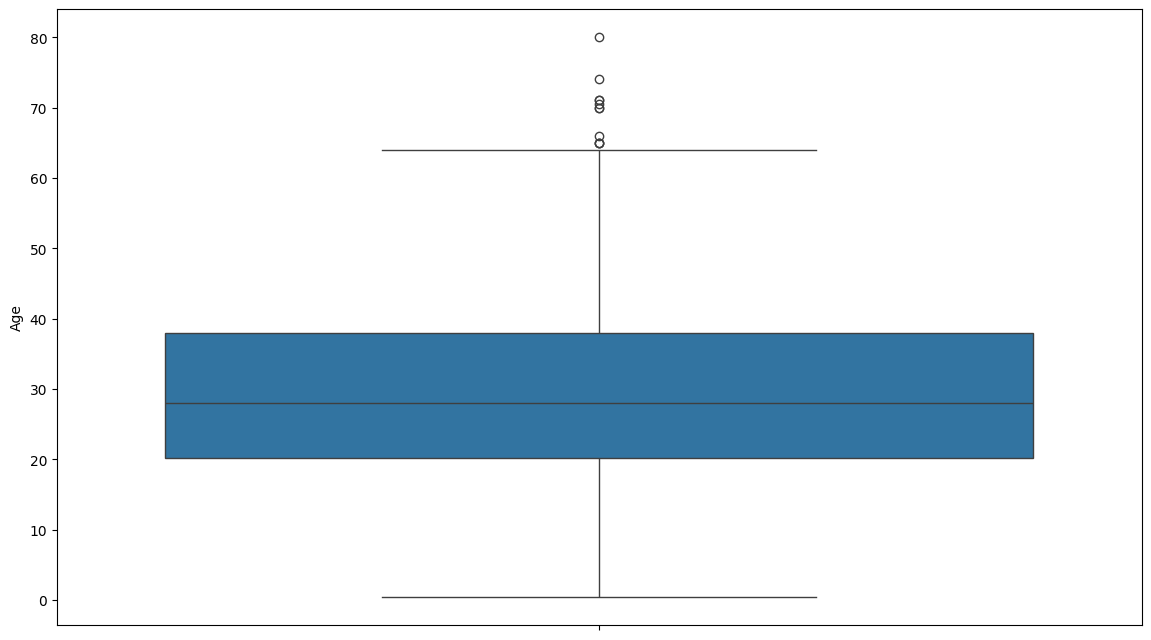

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(df['Age'])

In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
df['Age']  = df['Age'].fillna(df['Age'].mean())

In [ ]:
df['Age']= df['Age'].astype('int')

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


<Axes: xlabel='Fare', ylabel='Count'>

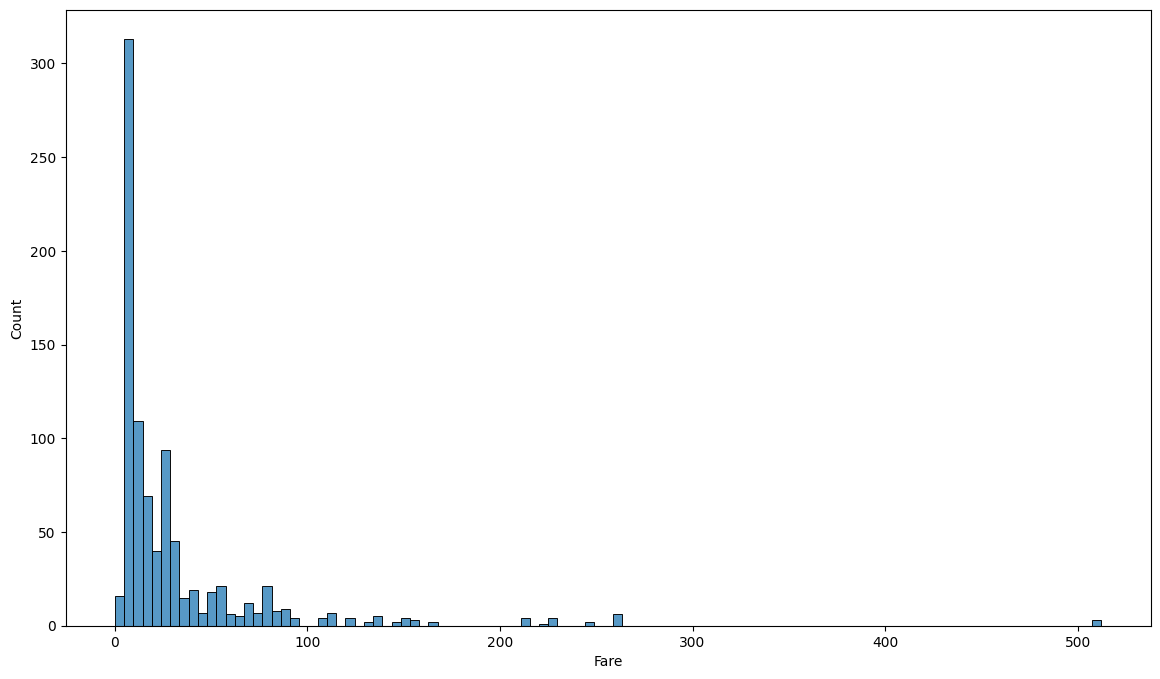

In [ ]:
plt.figure(figsize=(14,8))
sns.histplot(df['Fare'])

<Axes: ylabel='Fare'>

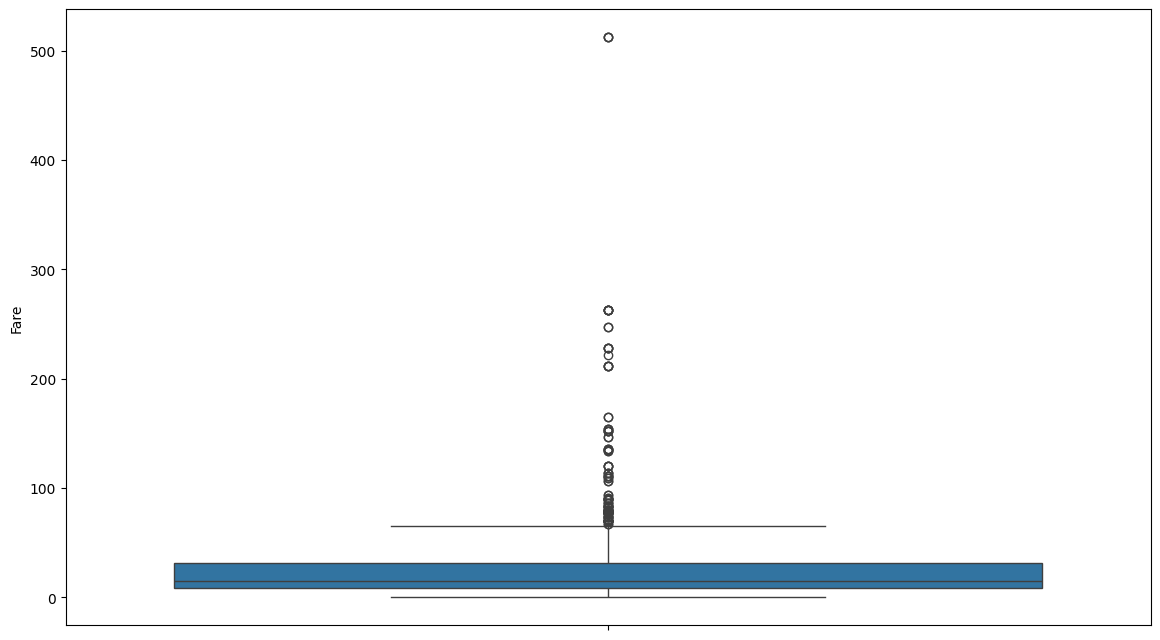

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(df['Fare'])

In [ ]:
Q1_f = df['Fare'].quantile(0.25)
Q3_f = df['Fare'].quantile(0.75)
IQR_f = Q3_f - Q1_f

#IQR_duration = Q3_duration - Q1_duration
#

In [ ]:
Q1_A = df['Age'].quantile(0.25)
Q3_A = df['Age'].quantile(0.75)
IQR_A = Q3_A - Q1_A
df['Age'][df['Age']> Q1_A+1.5*IQR_f] =  Q3_A
df['Age'][df['Age']< Q1_A-1.5*IQR_f] =  Q1_A

<ipython-input-27-6287b448c6f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age']> Q1_A+1.5*IQR_f] =  Q3_A
<ipython-input-27-6287b448c6f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age']< Q1_A-1.5*IQR_f] =  Q1_A


In [ ]:
df['Fare'][df['Fare']> Q1_f+1.5*IQR_f] =  Q3_f

<ipython-input-28-5f503edeef12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'][df['Fare']> Q1_f+1.5*IQR_f] =  Q3_f


In [ ]:
df['Fare'][df['Fare']< Q1_f-1.5*IQR_f] =  Q1_f

<ipython-input-29-26d1ff154f0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'][df['Fare']< Q1_f-1.5*IQR_f] =  Q1_f


<Axes: >

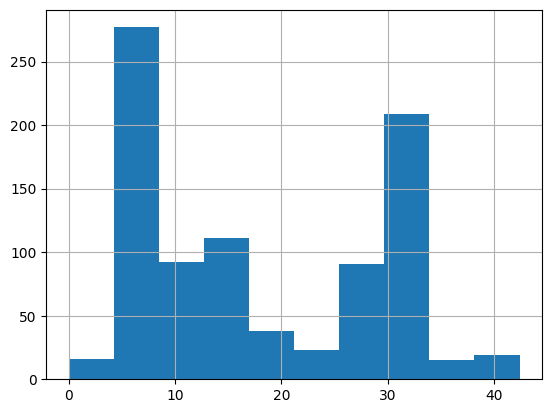

In [ ]:
df['Fare'].hist()

<Axes: ylabel='Fare'>

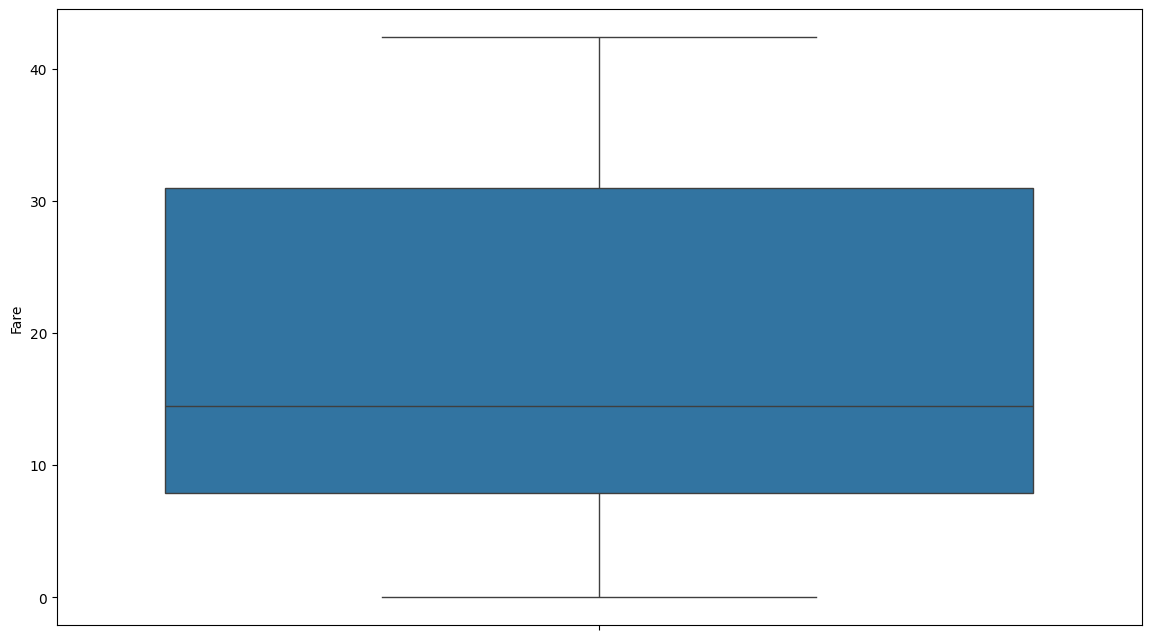

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(df['Fare'])

[]

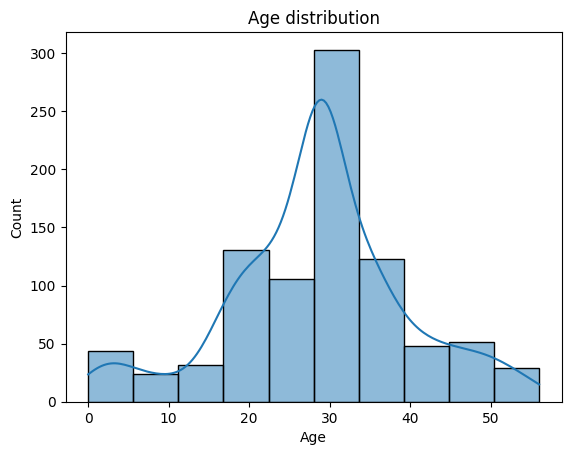

In [ ]:
sns.histplot(df['Age'] , bins = 10 , kde = True)
plt.title('Age distribution')
plt.plot()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()

In [ ]:
df['Embarked'] = lb.fit_transform(df['Embarked'])
df['Sex'] = lb.fit_transform(df['Sex'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.250,2
1,1,1,0,38,1,0,31.000,0
2,1,3,0,26,0,0,7.925,2
3,1,1,0,35,1,0,31.000,2
4,0,3,1,35,0,0,8.050,2


In [ ]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.057464,-0.035322,0.081629,0.290173,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.302389,0.083081,0.018443,-0.670180,0.162098
Sex,-0.543351,0.131900,1.000000,0.065021,-0.114631,-0.245489,-0.221355,0.108262
Age,-0.057464,-0.302389,0.065021,1.000000,-0.240446,-0.197272,0.059702,-0.017835
SibSp,-0.035322,0.083081,-0.114631,-0.240446,1.000000,0.414838,0.387184,0.068230
Parch,0.081629,0.018443,-0.245489,-0.197272,0.414838,1.000000,0.399079,0.039798
Fare,0.290173,-0.670180,-0.221355,0.059702,0.387184,0.399079,1.000000,-0.140900
Embarked,-0.167675,0.162098,0.108262,-0.017835,0.068230,0.039798,-0.140900,1.000000


<Axes: >

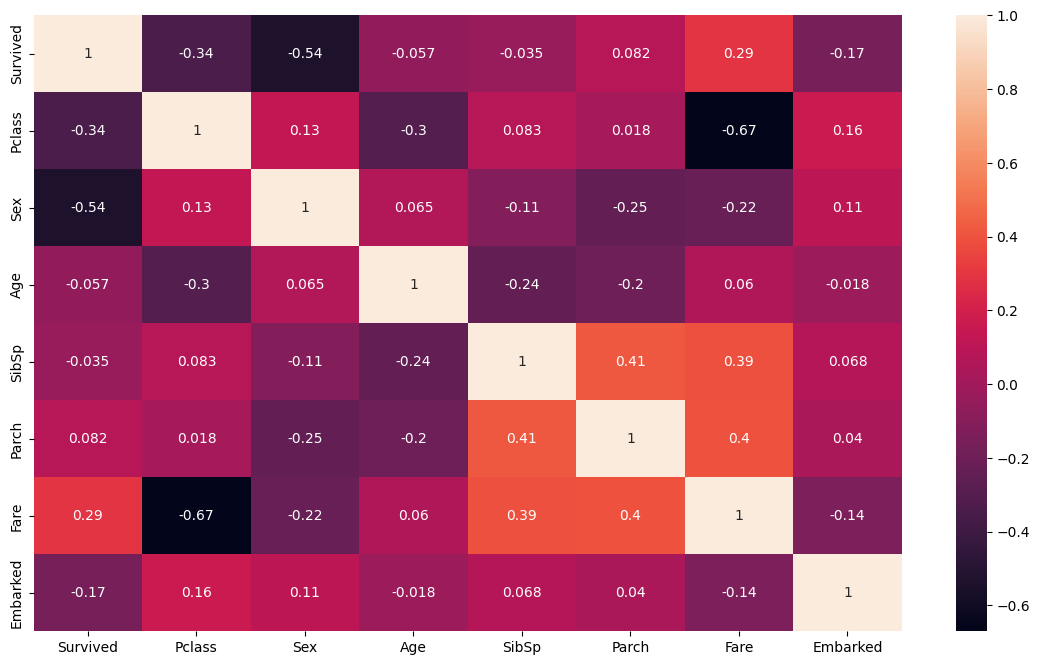

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr() , annot =True)

In [ ]:
X = df.drop(columns='Survived')
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf' )

In [ ]:
model.fit (X_train_scaled,y_train )

SVC()

In [ ]:
model.score(X_train_scaled , y_train)

0.8412921348314607

In [ ]:
model.score(X_test_scaled , y_test)

0.8156424581005587

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report( y_pred , y_test))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       114
           1       0.72      0.82      0.76        65

    accuracy                           0.82       179
   macro avg       0.80      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR =LogisticRegression()

In [ ]:
LR.fit(X_train_scaled,y_train )

LogisticRegression()

In [ ]:
LR.score(X_test_scaled , y_test)

0.8100558659217877

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_scaled,y_train )

KNeighborsClassifier()

In [ ]:
knn.score(X_test_scaled , y_test)

0.776536312849162

In [ ]:
yk_pred = knn.predict(X_test_scaled)

In [ ]:
print(classification_report( yk_pred , y_test))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       115
           1       0.66      0.77      0.71        64

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.79      0.78      0.78       179



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()

In [ ]:
DT.fit(X_train_scaled,y_train )

DecisionTreeClassifier()

In [ ]:
DT.score(X_test_scaled , y_test)

0.7988826815642458

In [ ]:
yDT_pred = knn.predict(X_test_scaled)
print(classification_report( yk_pred , y_test))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       115
           1       0.66      0.77      0.71        64

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.79      0.78      0.78       179

